In [1]:
from CompilerQC import *
import pickle
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import itertools
import shutil
from visualize_graphs import (
    without_compilation,
    advanced_plot_df,
    plot_settings_in_subplot,
)

In [2]:
# group settings by hand
number = 4
results = []
for idx, name in enumerate(
    os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
):
    print(idx, name)
    results.append(name.split(".")[0])

i = 0
for name in os.listdir(paths.parameters_path / f"run_{number}/dictionaries")[
    i : (i + 1)
]:
    print(name)
    with open(paths.parameters_path / f"run_{number}/dictionaries/{name}", "rb") as f:
        new_dicts = pickle.load(f)
        for idx, setting in enumerate(new_dicts):
            print(f"=========={idx}=============")
            for k, v in setting.items():
                print(k, v)

0 EnergyForDatabase4.pkl
EnergyForDatabase4.pkl
==========0=============
energy.polygon_object.scope_measure False
energy.polygon_object.exponent 2
==========1=============
energy.polygon_object.scope_measure True
energy.polygon_object.exponent 2
==========2=============
energy.all_constraints True
energy.scaling_for_plaq3 0
energy.scaling_for_plaq4 0
energy.scaling_model None
==========3=============
energy.all_constraints True
energy.scaling_model LHZ
==========4=============
energy.count_constraints True
energy.scaling_model None
chi_0 0.001


In [3]:
df = dict()
for name in results:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        df.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

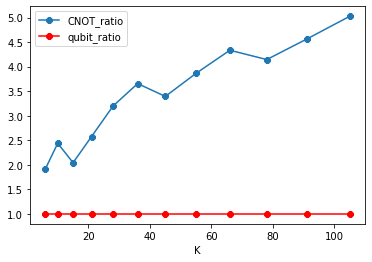

In [4]:
problem_folder = "lhz"
without_compilation(problem_folder)["CNOT_ratio"].plot(marker="8", label="CNOT_ratio")
without_compilation(problem_folder)["qubit_ratio"].plot(
    marker="8", color="red", label="qubit_ratio"
)
plt.legend()

In [5]:
# fig, ax = plt.subplots(figsize=(10, 10))
# x_axis, y_axis = 'K', 'CNOT_ratio'
# title = 'measures'
# legend_title = ""
# setting_numbers = [0, 1]
# setting_names= []
# name = "EnergyForDatabase4"
# #advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax, compare=True)

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

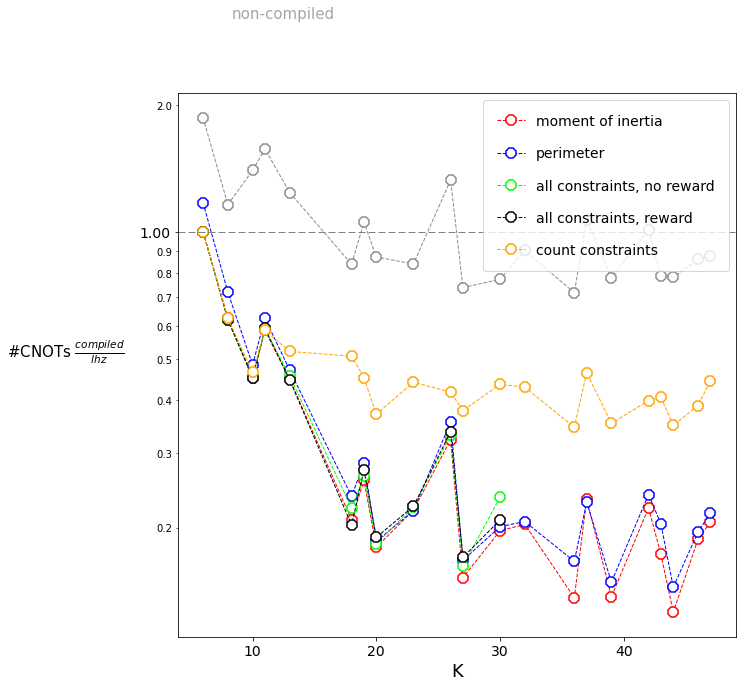

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "energy functions for non complete graphs"
legend_title = ""
setting_numbers = [0, 1, 2, 3, 4, 5]
setting_names = [
    "moment of inertia",
    "perimeter",
    "all constraints, no reward",
    "all constraints, reward",
    "count constraints",
]
name = "EnergyForDatabase4"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
)